In [70]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
%matplotlib inline 

In [54]:
student_data = pd.read_csv("Datasets/StudentsPerformance.csv")
student_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [55]:
student_data = student_data[['math score','reading score','writing score','gender']]
student_data['gender'] = student_data['gender'].apply(lambda x : 0 if x == "female" else 1)

In [56]:
student_data = student_data.sort_values(by="gender")
np.where(student_data["gender"]==0)[-1][-1]

517

In [57]:
X = student_data[['math score','reading score','writing score']].values
y = student_data['gender'].values
print(X.shape)
print(y.shape)

(1000, 3)
(1000,)


Text(0, 0.5, 'reading score')

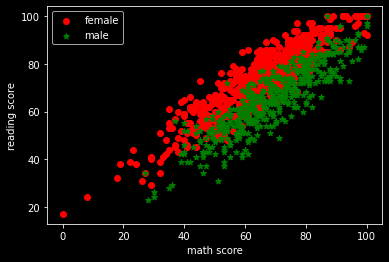

In [58]:
plt.scatter(X[:517,0],X[:517,1],color="red",marker="o",label="female")
plt.scatter(X[518:,0],X[518:,1],color="green",marker="*",label="male")
plt.legend(loc="best")
plt.xlabel("math score")
plt.ylabel("reading score")

Text(0.5, 0, 'reading score')

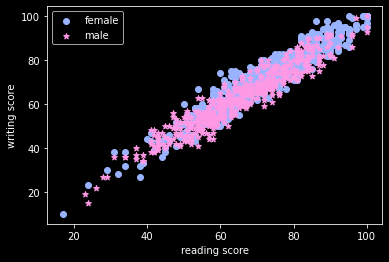

In [59]:
plt.scatter(X[:517,1],X[:517,2],color="#99b3ff",marker="o",label="female")
plt.scatter(X[518:,1],X[518:,2],color="#ff99e6",marker="*",label="male")
plt.legend(loc="best")
plt.ylabel("writing score")
plt.xlabel("reading score")

Text(0.5, 0, 'reading score')

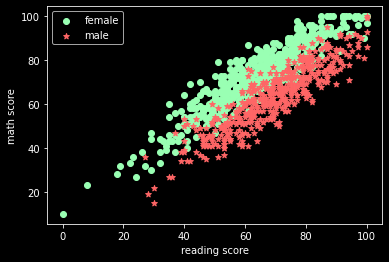

In [60]:
plt.scatter(X[:517,0],X[:517,2],color="#99ffb3",marker="o",label="female")
plt.scatter(X[518:,0],X[518:,2],color="#ff6666",marker="*",label="male")
plt.legend(loc="best")
plt.ylabel("math score")
plt.xlabel("reading score")

In [61]:
X = student_data[['math score','reading score']].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
print(X_train.shape)
print(y_train.shape)

(700, 2)
(700,)


In [62]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(X_train)
std.fit(X_test)
X_train_std = std.transform(X_train)
X_test_std = std.transform(X_test)
X_combined = np.vstack((X_train_std,X_test_std))
y_combined = np.hstack((y_train,y_test))

In [92]:
def plot_decision_regions(X,y,classifier,resolution=0.02):
    plt.style.use("dark_background")
    markers = ("s","x","o","*","^")
    colors = ("#3399ff","#009900","#ff5500","#c6538c","#ccccff")
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min,x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
                    c=colors[idx], marker=markers[idx], label=cl, edgecolor="red")
    plt.legend(loc="best")
    plt.xlabel("math score")
    plt.ylabel("reading score")

# Logistic Regression

In [93]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1.0,random_state=1,solver="lbfgs",max_iter=150)
lr.fit(X_train_std,y_train)
prediction = lr.predict(X_test_std)
print(classification_report(prediction,y_test))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84       172
           1       0.77      0.87      0.81       128

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.84      0.83      0.83       300



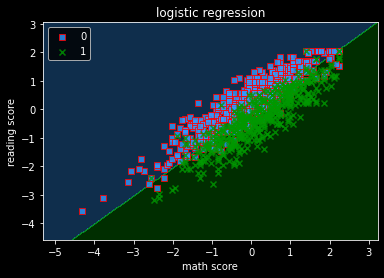

In [94]:
plt.title("logistic regression")
plot_decision_regions(X_combined,y_combined,classifier=lr)

In [71]:
print(f"Accuracy score using logistic regression: {accuracy_score(prediction,y_test)}")

Accuracy score using logistic regression: 0.83


# Support Vector Machines

In [121]:
from sklearn.svm import SVC
svm = SVC(C=2.0,kernel="rbf",random_state=1,gamma="auto")
svm.fit(X_train_std,y_train)
prediction = svm.predict(X_test_std)
print(classification_report(prediction,y_test))

              precision    recall  f1-score   support

           0       0.90      0.80      0.84       174
           1       0.76      0.87      0.81       126

    accuracy                           0.83       300
   macro avg       0.83      0.84      0.83       300
weighted avg       0.84      0.83      0.83       300



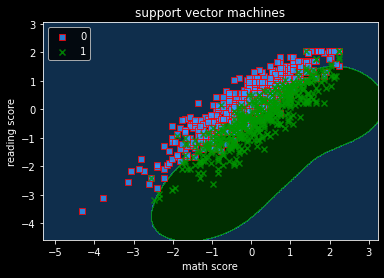

In [122]:
plt.title("support vector machines")
plot_decision_regions(X_combined,y_combined,classifier=svm)

In [123]:
print(f"Accuracy score using Support vector machines: {accuracy_score(prediction,y_test)}")

Accuracy score using Support vector machines: 0.83


# Decision Trees

In [124]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion="gini",max_depth=3,random_state=1)
tree.fit(X_train_std,y_train)
prediction = tree.predict(X_test_std)
print(classification_report(prediction,y_test))


              precision    recall  f1-score   support

           0       0.61      0.78      0.68       120
           1       0.82      0.66      0.73       180

    accuracy                           0.71       300
   macro avg       0.71      0.72      0.71       300
weighted avg       0.73      0.71      0.71       300



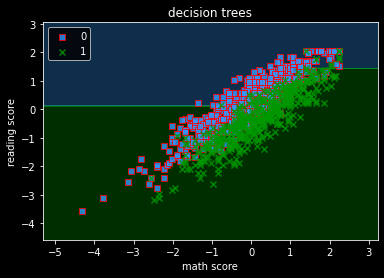

In [119]:
plt.title("decision trees")
plot_decision_regions(X_combined,y_combined,classifier=tree)

In [125]:
print(f"Accuracy score using Decision trees: {accuracy_score(prediction,y_test)}")

Accuracy score using Decision trees: 0.71


# Random Forest

In [128]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion="gini",n_estimators=30,n_jobs=2,random_state=1)
forest.fit(X_train_std,y_train)
prediction = forest.predict(X_test_std)
print(classification_report(prediction,y_test))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80       178
           1       0.69      0.82      0.75       122

    accuracy                           0.78       300
   macro avg       0.77      0.78      0.77       300
weighted avg       0.79      0.78      0.78       300



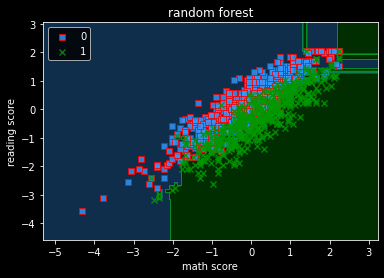

In [129]:
plt.title("random forest")
plot_decision_regions(X_combined,y_combined,classifier=forest)

In [130]:
print(f"Accuracy score using random forest: {accuracy_score(prediction,y_test)}")

Accuracy score using random forest: 0.7766666666666666


# K Nearest Neighbors

In [135]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,p=3,metric="minkowski")
knn.fit(X_train_std,y_train)
prediction = knn.predict(X_test_std)
print(classification_report(prediction,y_test))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82       181
           1       0.70      0.86      0.77       119

    accuracy                           0.80       300
   macro avg       0.80      0.81      0.80       300
weighted avg       0.82      0.80      0.80       300



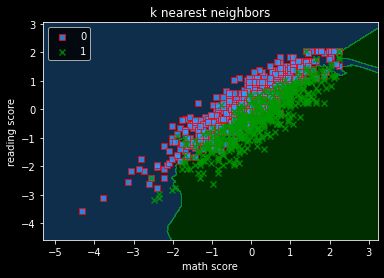

In [136]:
plt.title("k nearest neighbors")
plot_decision_regions(X_combined,y_combined,classifier=knn)

In [137]:
print(f"Accuracy score using k nearest neighbors: {accuracy_score(prediction,y_test)}")

Accuracy score using k nearest neighbors: 0.8


# Conclusion:
---
`Dataset` : **Students Performance**

`Target` : **Predicting Gender based on their math score and reading score**

**`Models/Algorithm used`** : 
1. *Logistic Regression*
2. *Support Vector Machines*
3. *Decision Trees*
4. *Random Forest*
5. *K Nearest Neighbor*

`Maximum Accuracy` : 0.83

`Perfect Model` : *Linear regression* and *Support vector machines*